In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
def view_train_stat(history):
  print(history.history.keys())
  plt.plot(history.history['mae'])
  plt.plot(history.history['val_mae'])
  plt.title('model accuracy (mae)')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  plt.close()

def mean_absolute_percentage_error(y_true, y_pred): 
  mape_sum = 0
  errors = []
  for i in range (0, len(y_true)) :
      if y_true[i] > 0:
          mape_sum += (abs((y_pred[i] - y_true[i]))/y_true[i])
          errors.append((y_pred[i] - y_true[i])/y_true[i])
      elif y_true[i] == 0 and y_pred[i] == 0:
          mape_sum += 0
          errors.append(0)
  mape = mape_sum/len(y_true)
  return [mape*100, max(errors)*100, min(errors)*100]

In [ ]:
!gdown --id 1beFZRSpMITmnf8t5amCfCefqpjffxylx
!gdown --id 13HASTTzXrgA0_ZhDugVlOlqdyiUbfgn4
!gdown --id 1VOKB0D9ezAwoPh5t_B20Lw1nhw0ISKiK

!gdown --id 1zQyEoPGn1VFGoPtDllVfDKG3s08lsPkH
!gdown --id 1lKrGIvIums9bNgoQY1QnH9SdCjkKR_mt
!gdown --id 1fzaBpG7QOlgAToeQzVj5iXUb9kLyfze0

!gdown --id 1kp-T3hYl5iblOr94J2wHoRnPa4qnAYa3

Downloading...
From: https://drive.google.com/uc?id=1beFZRSpMITmnf8t5amCfCefqpjffxylx
To: /content/USD_THB_2018_2019.csv
100% 15.9k/15.9k [00:00<00:00, 7.17MB/s]
Downloading...
From: https://drive.google.com/uc?id=13HASTTzXrgA0_ZhDugVlOlqdyiUbfgn4
To: /content/USD_THB_2019_2020.csv
100% 16.1k/16.1k [00:00<00:00, 5.90MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VOKB0D9ezAwoPh5t_B20Lw1nhw0ISKiK
To: /content/USD_THB_2020_2021.csv
100% 16.0k/16.0k [00:00<00:00, 26.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zQyEoPGn1VFGoPtDllVfDKG3s08lsPkH
To: /content/Brent_Futures_2018_2019.csv
100% 17.1k/17.1k [00:00<00:00, 26.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lKrGIvIums9bNgoQY1QnH9SdCjkKR_mt
To: /content/Brent_Futures_2019_2020.csv
100% 17.3k/17.3k [00:00<00:00, 26.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fzaBpG7QOlgAToeQzVj5iXUb9kLyfze0
To: /content/Brent_Futures_2020_2021.csv
100% 17.2k/17.2k [00:00<00:00, 27.2MB/s]
Downloadin

# Data Observation

In [ ]:
brent_df_1 = pd.read_csv('Brent_Futures_2018_2019.csv')
brent_df_2 = pd.read_csv('Brent_Futures_2019_2020.csv')
brent_df_3 = pd.read_csv('Brent_Futures_2020_2021.csv')
currency_df_1 = pd.read_csv('USD_THB_2018_2019.csv')
currency_df_2 = pd.read_csv('USD_THB_2019_2020.csv')
currency_df_3 = pd.read_csv('USD_THB_2020_2021.csv')

In [ ]:
brent_df = pd.concat([brent_df_1, brent_df_2, brent_df_3], axis=0)
currency_df = pd.concat([currency_df_1, currency_df_2, currency_df_3], axis=0)

In [ ]:
brent_df['Date'] = pd.to_datetime(brent_df['Date'])
brent_df = brent_df.sort_values('Date').reset_index(drop=True)

currency_df.columns = brent_df.columns[[0,1,2,3,4,6]]
currency_df['Date'] = pd.to_datetime(currency_df['Date'])
currency_df = currency_df.sort_values('Date').reset_index(drop=True)

In [ ]:
selling_df = pd.read_csv('Bangchak_Oil_Price.csv').iloc[:,:10]
for i in range(len(selling_df)):
  selling_df['Date'][i] = selling_df['Date'][i][:-4] + str(int(selling_df['Date'][i][-4:]) - 543)
selling_df['Date'] = pd.to_datetime(selling_df['Date'], dayfirst=True)
selling_df = selling_df.sort_values('Date').reset_index(drop=True)

In [ ]:
selling_df.columns

Index(['Date', 'Hi premium diesel s b7', 'Hi diesel s b7', 'hi diesel s',
       'hi diesel b20 s', 'gasohol e85 s evo', 'gasohol e20 s evo',
       'gasohol 91s evo', 'gasohol 95s evo', 'ngv'],
      dtype='object')

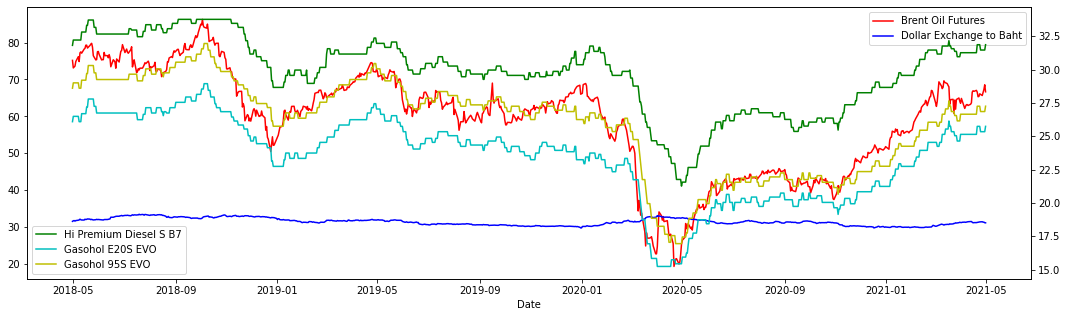

In [ ]:
fig, ax1 = plt.subplots(figsize=(18,5))
ax2 = ax1.twinx()
ax1.plot(brent_df['Date'], brent_df['Price'], 'r', label='Brent Oil Futures')
ax1.plot(currency_df['Date'], currency_df['Price'], 'b', label='Dollar Exchange to Baht')
ax2.plot(selling_df['Date'], selling_df['Hi premium diesel s b7'], 'g', label='Hi Premium Diesel S B7')
ax2.plot(selling_df['Date'], selling_df['gasohol e20 s evo'], 'c', label='Gasohol E20S EVO')
ax2.plot(selling_df['Date'], selling_df['gasohol 95s evo'], 'y', label='Gasohol 95S EVO')
ax1.set_xlabel('Date')
ax1.legend()
ax2.legend()
plt.show()

In [ ]:
df = pd.DataFrame()
df['Date'] = selling_df['Date']
df = df.merge(brent_df, how='left', on='Date').iloc[:,:2]
df = df.rename(columns={'Price': 'Brent Oil Futures'})
df.tail(3)

,Date,Brent Oil Futures
1094,2021-04-28,67.27
1095,2021-04-29,68.56
1096,2021-04-30,66.66


In [ ]:
df = df.merge(currency_df, how='left', on='Date').iloc[:,:3]
df = df.rename(columns={'Price': 'USD to Baht'})
df.tail(3)

,Date,Brent Oil Futures,USD to Baht
1094,2021-04-28,67.27,31.33
1095,2021-04-29,68.56,31.18
1096,2021-04-30,66.66,31.15


In [ ]:
df['Diesel Price'] = selling_df['Hi premium diesel s b7']
df['E20 Price'] = selling_df['gasohol e20 s evo']
df['Gasohol 95 Price'] = selling_df['gasohol 95s evo']

In [ ]:
for i in range(len(df)):
  if df['Brent Oil Futures'][i] != df['Brent Oil Futures'][i]:
    df['Brent Oil Futures'][i] = df['Brent Oil Futures'][i-1]
  if df['USD to Baht'][i] != df['USD to Baht'][i]:
    df['USD to Baht'][i] = df['USD to Baht'][i-1]

In [ ]:
df

,Date,Brent Oil Futures,USD to Baht,Diesel Price,E20 Price,Gasohol 95 Price
0,2018-04-30,75.17,31.555,31.81,26.09,28.60
1,2018-05-01,73.13,31.690,32.21,26.49,29.00
2,2018-05-02,73.36,31.770,32.21,26.49,29.00
3,2018-05-03,73.62,31.620,32.21,26.49,29.00
4,2018-05-04,74.87,31.760,32.21,26.49,29.00
...,...,...,...,...,...,...
1092,2021-04-26,65.65,31.440,31.46,25.34,26.85
1093,2021-04-27,66.42,31.340,31.46,25.34,26.85
1094,2021-04-28,67.27,31.330,31.46,25.34,26.85
1095,2021-04-29,68.56,31.180,31.46,25.34,26.85


# Multilayer Perceptron (MLP)

In [ ]:
window = 14
forward = 3
X = []
y = []
for i in range(window, len(df)-forward+1):
  tmp_X = []
  for j in range(0, window):
    tmp_X.append([df['Brent Oil Futures'][i-window+j], df['USD to Baht'][i-window+j], df['Gasohol 95 Price'][i-window+j]])
  X.append(tmp_X)
  y.append(df['Gasohol 95 Price'][i+forward-1])

In [ ]:
X = np.array(X)
n_input = X.shape[1] * X.shape[2]
X_flatten = X.reshape((X.shape[0], n_input))
y = np.array(y)

X_train = X_flatten[:-240]
X_val = X_flatten[-240:-120]
X_test = X_flatten[-120:]
y_train = y[:-240]
y_val = y[-240:-120]
y_test = y[-120:]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_input))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4300      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 9,401
Trainable params: 9,401
Non-trainable params: 0
_________________________________________________________________


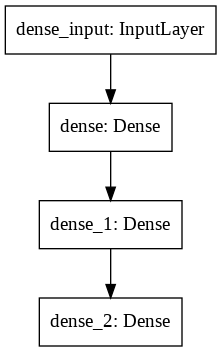

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_mlp.png')

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


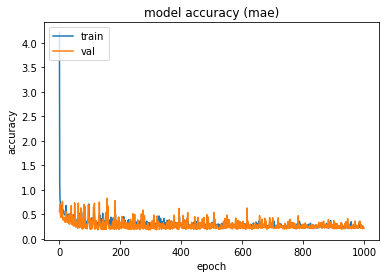

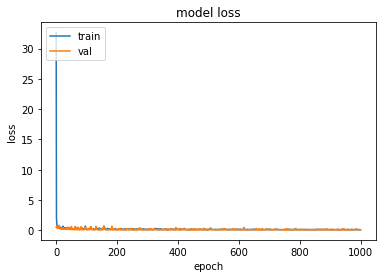

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000, verbose=0)
view_train_stat(history)

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.0815 - mae: 0.2271


[0.0815151184797287, 0.22706227004528046]

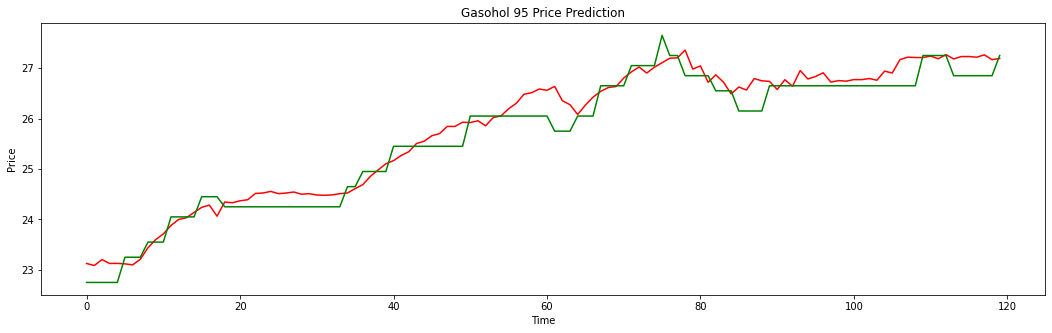

In [ ]:
y_pred_mlp = model.predict(X_test)

plt.figure(figsize=(18,5))
plt.plot(y_pred_mlp, color= 'red')
plt.plot(y_test, color='green')
plt.title("Gasohol 95 Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [ ]:
mean_absolute_percentage_error(y_test.reshape(y_test.shape[0]).tolist(), y_pred_mlp.reshape(y_pred_mlp.shape[0]).tolist())[0]

0.8889025402123125

# Convolutional Neural Network (CNN)

In [ ]:
X_train = X[:-240]
X_val = X[-240:-120]
X_test = X[-120:]
y_train = y[:-240]
y_val = y[-240:-120]
y_test = y[-120:]

n_timesteps = X.shape[1]
n_features = X.shape[2]

In [ ]:
from keras.models import Sequential
from tensorflow.keras import datasets, layers, models

model = Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu',input_shape=(n_timesteps, n_features)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['mae'])

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


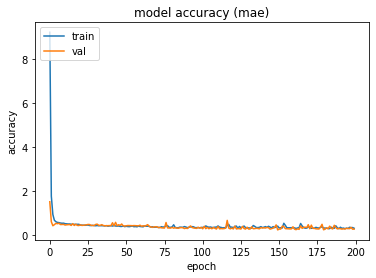

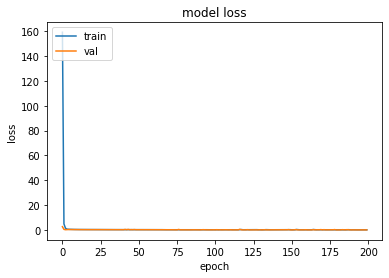

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, verbose=0)
view_train_stat(history)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 13, 64)            448       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 6, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 384)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 19,749
Trainable params: 19,749
Non-trainable params: 0
_________________________________________________________________


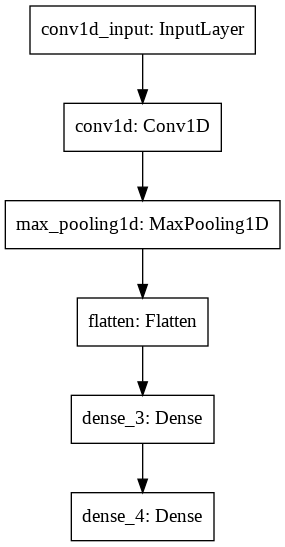

In [ ]:
plot_model(model, to_file='model_cnn.png')

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.0833 - mae: 0.2248


[0.08325307071208954, 0.2248345911502838]

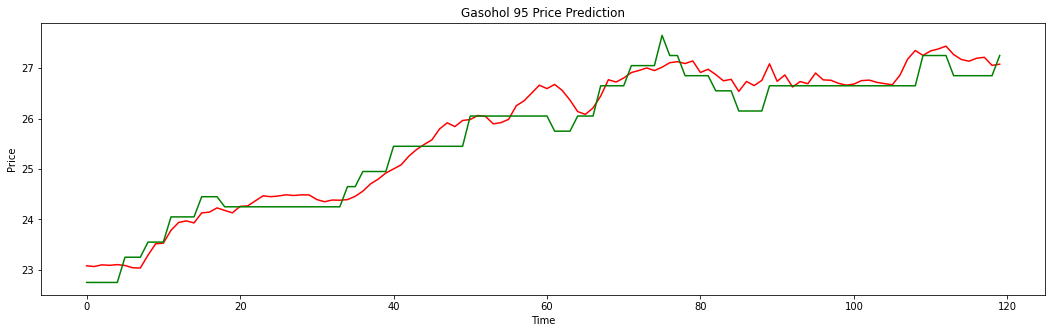

In [ ]:
y_pred = model.predict(X_test)

plt.figure(figsize=(18,5))
plt.plot(y_pred, color= 'red')
plt.plot(y_test, color='green')
plt.title("Gasohol 95 Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [ ]:
mean_absolute_percentage_error(y_test.reshape(y_test.shape[0]).tolist(), y_pred.reshape(y_pred.shape[0]).tolist())[0]

0.879559155679113

# Long Short-Term Memory (LSTM)

In [ ]:
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(30))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


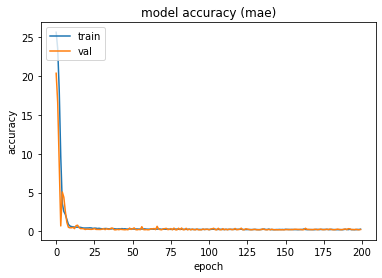

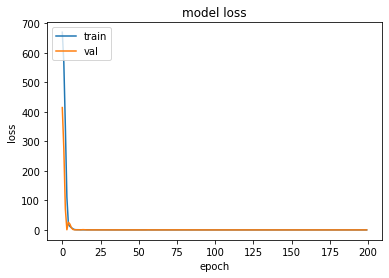

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, verbose=0)
view_train_stat(history)

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.1100 - mae: 0.2872


[0.10997099429368973, 0.28722745180130005]

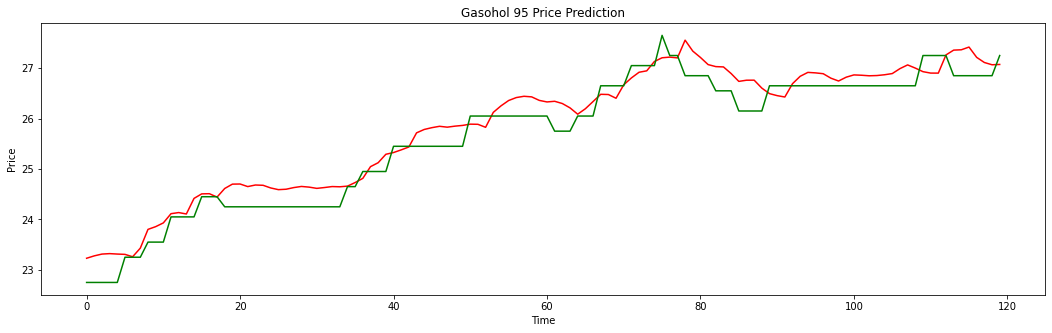

In [ ]:
y_pred = model.predict(X_test)

plt.figure(figsize=(18,5))
plt.plot(y_pred, color= 'red')
plt.plot(y_test, color='green')
plt.title("Gasohol 95 Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [ ]:
mean_absolute_percentage_error(y_test.reshape(y_test.shape[0]).tolist(), y_pred.reshape(y_pred.shape[0]).tolist())[0]

1.128006768669119

# Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

sc0 = StandardScaler()
sc1 = StandardScaler()
sc2 = StandardScaler()

df['Brent Oil Futures'] = sc0.fit_transform(np.array(df['Brent Oil Futures']).reshape(-1, 1))
df['USD to Baht'] = sc1.fit_transform(np.array(df['USD to Baht']).reshape(-1, 1))
df['Gasohol 95 Price'] = sc2.fit_transform(np.array(df['Gasohol 95 Price']).reshape(-1, 1))

In [ ]:
df

,Date,Brent Oil Futures,USD to Baht,Diesel Price,E20 Price,Gasohol 95 Price
0,2018-04-30,1.160113,0.111775,31.81,26.09,0.768078
1,2018-05-01,1.013712,0.251761,32.21,26.49,0.883463
2,2018-05-02,1.030218,0.334716,32.21,26.49,0.883463
3,2018-05-03,1.048877,0.179176,32.21,26.49,0.883463
4,2018-05-04,1.138584,0.324347,32.21,26.49,0.883463
...,...,...,...,...,...,...
1092,2021-04-26,0.476905,-0.007472,31.46,25.34,0.263270
1093,2021-04-27,0.532164,-0.111166,31.46,25.34,0.263270
1094,2021-04-28,0.593165,-0.121535,31.46,25.34,0.263270
1095,2021-04-29,0.685743,-0.277075,31.46,25.34,0.263270


In [ ]:
window = 14
forward = 3
X = []
y = []
for i in range(window, len(df)-forward+1):
  tmp_X = []
  for j in range(0, window):
    tmp_X.append([df['Brent Oil Futures'][i-window+j], df['USD to Baht'][i-window+j], df['Gasohol 95 Price'][i-window+j]])
  X.append(tmp_X)
  y.append(df['Gasohol 95 Price'][i+forward-1])

In [ ]:
X = np.array(X)
n_input = X.shape[1] * X.shape[2]
X_flatten = X.reshape((X.shape[0], n_input))
y = np.array(y)

X_train = X[:-240]
X_val = X[-240:-120]
X_test = X[-120:]
y_train = y[:-240]
y_val = y[-240:-120]
y_test = y[-120:]

In [ ]:
model = Sequential()
model.add(LSTM(30))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


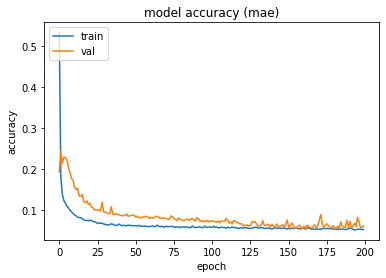

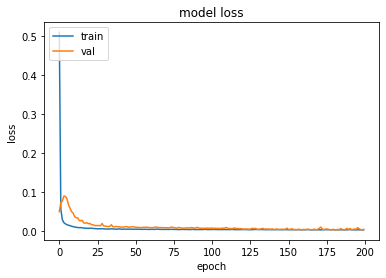

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, verbose=0)
view_train_stat(history)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30)                4080      
_________________________________________________________________
dense_7 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 5,041
Trainable params: 5,041
Non-trainable params: 0
_________________________________________________________________


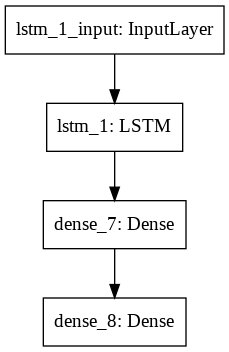

In [ ]:
plot_model(model, to_file='model_lstm.png')

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.0087 - mae: 0.0757


[0.008715721778571606, 0.07566758990287781]

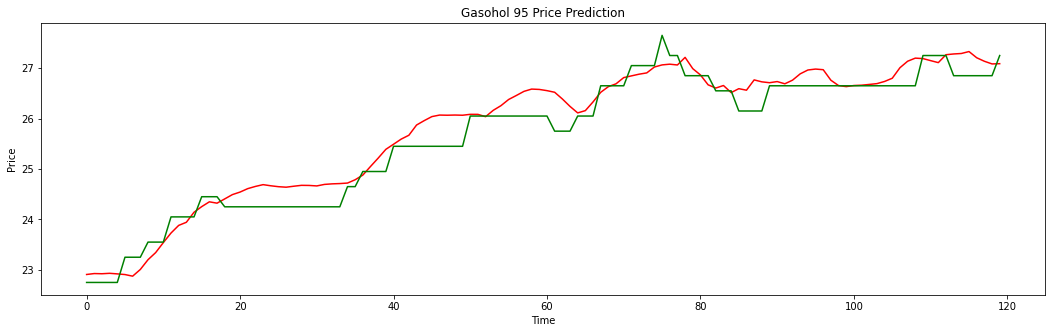

In [ ]:
y_pred_sc = model.predict(X_test)
y_pred_sc = sc2.inverse_transform(y_pred_sc)
y_test = sc2.inverse_transform(y_test)

plt.figure(figsize=(18,5))
plt.plot(y_pred_sc, color= 'red')
plt.plot(y_test, color='green')
plt.title("Gasohol 95 Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [ ]:
mean_absolute_percentage_error(y_test.reshape(y_test.shape[0]).tolist(), y_pred_sc.reshape(y_pred_sc.shape[0]).tolist())[0]

1.030761824036421

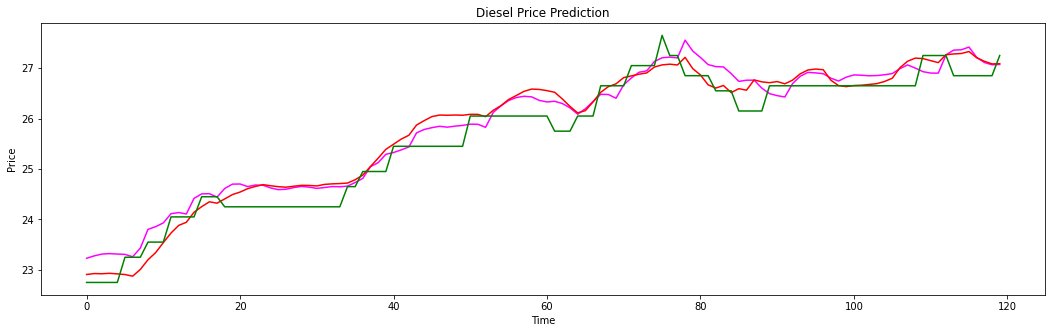

In [ ]:
plt.figure(figsize=(18,5))
plt.plot(y_pred, color= 'magenta')
plt.plot(y_pred_sc, color= 'red')
plt.plot(y_test, color='green')
plt.title("Diesel Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()